In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def to_complex(mag: np.ndarray, pha: np.ndarray) -> np.ndarray:
    '''from mag, pha to rf'''
    real = np.cos(pha) * mag
    imag = np.sin(pha) * mag
    rf = real + imag * 1j
    return rf

def to_mag_pha(rf: np.ndarray) -> tuple:
    '''from rf to mag, pha'''
    pha = np.angle(rf)
    mag = np.abs(rf)
    return mag, pha

### 1. debug

In [ ]:
# Define the parameters of the Gaussian distribution
mean = [0, 0]  # mean of the x and y coordinates
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix

# Generate a grid of points in the 2D space
x = np.linspace(mean[0] - 0, mean[0] + 2, 100)
y = np.linspace(mean[1] - 2, mean[1] + 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate the probability density function (PDF) at each point
Z = np.exp(-((X - mean[0])**2 + (Y - mean[1])**2) / (2 * cov[0][0]))

# Plot the 2D Gaussian distribution
plt.imshow(Z, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('2D Gaussian Distribution'), plt.xlabel('X'), plt.ylabel('Y')
plt.show()

# Define the parameters of the Gaussian distribution
mean = [0, 0]  # mean of the x and y coordinates
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix

X, Y = np.meshgrid(np.linspace(mean[0] - 1, mean[0] + 1, 200), np.linspace(mean[1] - 1, mean[1] + 1, 200))
Z0 = np.exp(-((X - mean[0])**2 + (Y - mean[1])**2) / (2 * cov[0][0]))

X, Y = np.meshgrid(np.linspace(mean[0] - 4, mean[0] + 4, 200), np.linspace(mean[1] - 2, mean[1] + 6, 200))
Z1 = np.exp(-((X - mean[0])**2 + (Y - mean[1])**2) / (2 * cov[0][0]))

X, Y = np.meshgrid(np.linspace(mean[0] - 3, mean[0] + 1, 200), np.linspace(mean[1] - 3, mean[1] +1, 200))
Z2 = np.exp(-((X - mean[0])**2 + (Y - mean[1])**2) / (2 * cov[0][0]))
X, Y = np.meshgrid(np.linspace(mean[0] - 2, mean[0] + 6, 200), np.linspace(mean[1] - 3, mean[1] +1, 200))
Z3 = np.exp(-((X - mean[0])**2 + (Y - mean[1])**2) / (2 * cov[0][0]))
# Plot the 2D Gaussian distribution
plt.imshow(Z1+Z2+Z3, cmap='jet')
plt.colorbar(label='Probability Density')
plt.title('2D Gaussian Distribution'), plt.xlabel('X'), plt.ylabel('Y')
plt.show()

### 3. Debugging

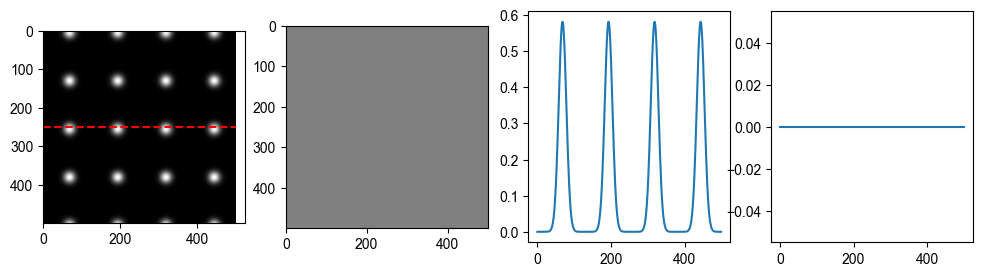

In [ ]:
nX    = 500
nY    = 500
nRow = 10
nCol = 10
nCoil = nRow*nCol
nBlock = 4
relative_radius = 5
verbose = False

nRowall  = nRow * nBlock
nColall  = nCol * nBlock

sigma = 3
r_x = relative_radius*nX/nRowall/2/sigma
r_y = relative_radius*nY/nColall/2/sigma

centerX = np.linspace(-nX/nBlock, nX*(nBlock+1)/nBlock, nRow*(nBlock+2), endpoint=False) + nX/nRowall/2
centerY = np.linspace(-nY/nBlock, nY*(nBlock+1)/nBlock, nCol*(nBlock+2), endpoint=False) + nY/nColall/2
X, Y = np.meshgrid(np.linspace(0, nX, nX, endpoint=False) + 0.5,np.linspace(0, nY, nY, endpoint=False) + 0.5)
BX, BY = np.meshgrid(np.linspace(0, nRow*(nBlock+2), nBlock+2, endpoint=False, dtype=np.int64),np.linspace(0, nCol*(nBlock+2), nBlock+2, endpoint=False, dtype=np.int64))
csm = np.zeros((nY, nX, nCoil), dtype=np.complex64)
for row in range(nRow):
    for col in range(nCol):
        for i in range(nBlock+2):
            for j in range(nBlock+2):
                x = centerX[BX[i,j]+row]
                y = centerY[BY[i,j]+col]
                mag = np.exp(-(((X-x)/r_x)**2 + ((Y-y)/r_y)**2)/2)
                csm[:, :, row*nCol+col] += mag
        # pha = np.angle((X -  x) + 1j*(Y - y))
        # pha = np.exp(-(((X-x)/(5*nX/2/sigma))**2 + ((Y-y)/(5*nY/2/sigma))**2)/2) * 2*np.pi - np.pi
        # pha = np.sqrt((X-x)**2 + (Y-y)**2)/(np.minimum(nX/nRow/2, nY/nCol/2))**2 * np.pi
        # pha = pha if (row+col) % 2 == 0 else -pha 
        # csm[:, :, row*nRow+col] = to_complex(csm[:, :, row*nCol+col], pha)

norm = np.sqrt(np.sum(np.abs(csm)**2, axis=2))
csm = np.transpose(csm, (2, 0, 1)) / norm

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].imshow(np.abs(csm[nCoil//2, ...]), cmap='gray')
axs[0].hlines(nX//2, 0, nY, colors='r', linestyles='--')
axs[1].imshow(np.angle(csm[nCoil//2, ...]), cmap='gray', vmin=-np.pi, vmax=np.pi)
axs[2].plot(np.abs(csm[nCoil//2, nX//2, :]))
axs[3].plot(np.angle(csm[nCoil//2, nX//2, :]))
plt.show()

In [ ]:
nCoil
np.linspace(-np.pi, np.pi, nCoil, endpoint=False)

array([-3.14159265, -2.74889357, -2.35619449, -1.96349541, -1.57079633,
       -1.17809725, -0.78539816, -0.39269908,  0.        ,  0.39269908,
        0.78539816,  1.17809725,  1.57079633,  1.96349541,  2.35619449,
        2.74889357])

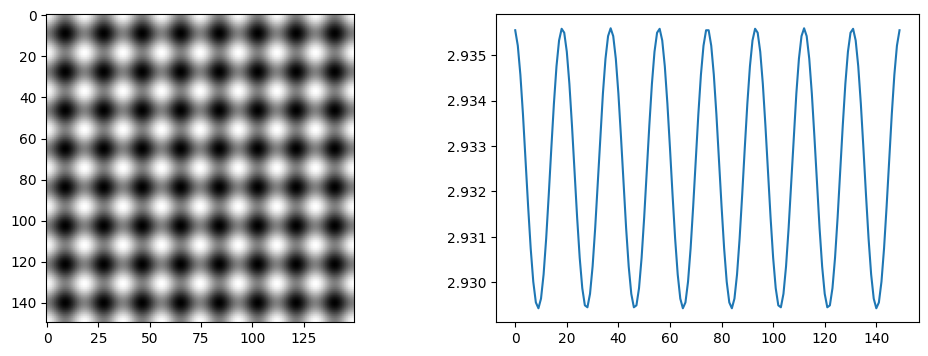

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(np.sum(np.abs(csm), axis=0), cmap='gray')
axs[1].plot(np.sum(np.abs(csm), axis=0)[65, :])

In [ ]:
norm = np.sqrt(np.sum(np.abs(csm)**2, axis=2))
csm = np.transpose(csm, (2, 0, 1)) / norm

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].imshow(np.abs(csm[nCoil//2, ...]), cmap='gray')

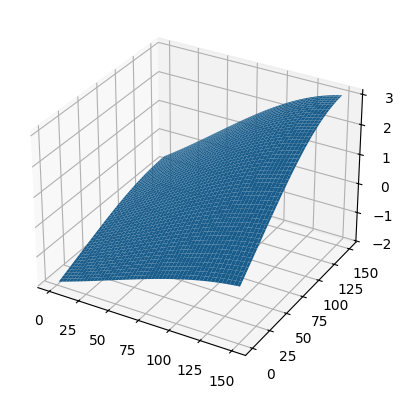

In [34]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(1, nX, nX)
y = np.linspace(1, nY, nY)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面图
ax.plot_surface(X, Y, np.angle(csm[nCoil//2, ...]))

In [23]:
import mpl_toolkits.axes_grid1 as mpl_axes_grid1

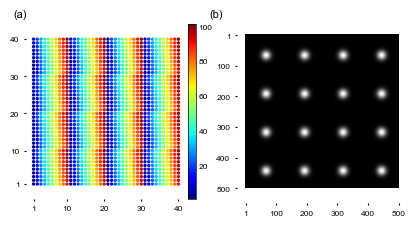

In [ ]:
import matplotlib
matplotlib.rc("font", family="Arial")
from matplotlib import colors as mcolors

values = np.linspace(1, nRow*nCol, nRow*nCol, dtype=np.int32)
cm_gray = plt.get_cmap("jet")
cm_gray_ref = cm_gray.from_list("gray_ref",  cm_gray(values), len(values))
norm = mcolors.BoundaryNorm(values , cm_gray_ref.N)




color_facecolor = "#000000"
color_label     = "#cccccc"

color_facecolor = "#ffffff"
color_label     = "#000000"

fontsize_ticklabel = 6
fontsize_subfigure = 8

markersize_scatter = 2.
linewidth          = 0.5
ticklength         = 1.5

pad_labeltick      = 2

fig, axs = plt.subplots(1, 2, figsize=(10/2.53999863,5/2.53999863), squeeze=False, facecolor=color_facecolor)
ax1 = axs[0][0]
ax2 = axs[0][1]

for ax in [ax1, ax2]:
    ax.set_facecolor(color_facecolor)
    ax.tick_params(axis="both",color=color_label, labelcolor=color_label, labelsize=fontsize_ticklabel, length=ticklength)
    for spine in ax.spines:  # "left", "right", "bottom", "top"
        ax.spines[spine].set_color(color_label)
        ax.spines[spine].set_visible(False)
    ax.axis('equal')
for i in range(nRow):
    for j in range(nCol):
        im = ax1.scatter((BX[:-2,:-2]+i).flatten()+1, (BY[:-2,:-2]+j).flatten()+1, c=np.ones((nBlock)**2)*(i*nCol+j+1), s=markersize_scatter, cmap='jet', vmin=1, vmax=nRow*nCol+1)
ax1.yaxis.set_major_locator(plt.FixedLocator([1, 10, 20, 30, 40]))
ax1.xaxis.set_major_locator(plt.FixedLocator([1, 10, 20, 30, 40]))

ax2.imshow(np.abs(csm[nCoil//2+5, ...]), cmap='gray')
ax2.yaxis.set_major_locator(plt.FixedLocator([1, 100, 200, 300, 400, 500]))
ax2.xaxis.set_major_locator(plt.FixedLocator([1, 100, 200, 300, 400, 500]))
fig.tight_layout()

fig.text(0.0, 1, "(a)", ha="left", va="bottom", fontsize=fontsize_subfigure, color=color_label)
fig.text(0.5, 1, "(b)", ha="left", va="bottom", fontsize=fontsize_subfigure, color=color_label)

divider = mpl_axes_grid1.make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.02)
cb = fig.colorbar(im, cax=cax, drawedges=False)
cb.minorticks_off()
cb.ax.tick_params(color=color_label, labelcolor=color_label, labelsize=fontsize_ticklabel, length=ticklength, width=linewidth, pad=pad_labeltick)
# cb.set_ticks(ρ_values - (ρ_values - [-1; ρ_values][1:end-1]) / 2)
# cb.set_ticklabels([string(round(v, digits=2)) for v in ρ_values])
cb.ax.tick_params(size=0)
# cb.outline.set_visible(false)
cb.outline.set_edgecolor(color_label)
cb.outline.set_linewidth(linewidth)
cb.dividers.set_color(color_label)
cb.dividers.set_linewidth(linewidth)

fig.tight_layout(pad=0, h_pad=0, w_pad=0.5)

# fig.savefig("E:/skope/20241213/csm_gaussian_grid_block/csm_gaussian_grid_block.png", dpi=300, transparent=True, bbox_inches="tight", pad_inches=0)
# fig.savefig("E:/skope/KomaHighOrder/Figures/csm_gaussian_grid_block.png", dpi=900, transparent=False, bbox_inches="tight", pad_inches=0.1)

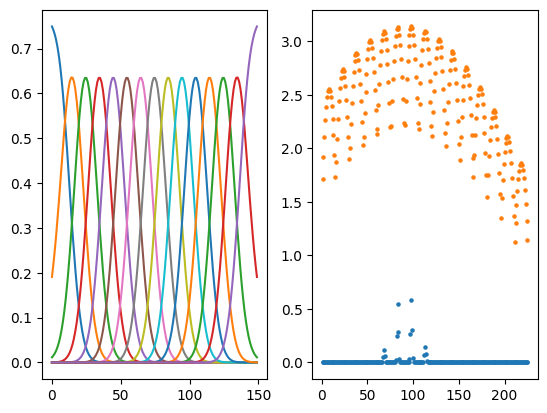

In [56]:
nX = 150
nY = 150
nCoil = 225
nRow = 15
nCol = 15
relative_radius = 5
verbose = False

centerX = np.linspace(0, nX, nRow, endpoint=False) + nX/nRow/2
centerY = np.linspace(0, nY, nCol, endpoint=False) + nY/nCol/2
X, Y = np.meshgrid(np.linspace(0, nX, nX, endpoint=False) + 0.5,np.linspace(0, nY, nY, endpoint=False) + 0.5)

sigma = 3
r_x = relative_radius*nX/nRow/2/sigma
r_y = relative_radius*nY/nCol/2/sigma


out = np.zeros((nY, nX, nCoil), dtype=np.complex64)
for row in range(nRow):
    for col in range(nCol):
        x = centerX[row]
        y = centerY[col]
        mag = np.exp(-(((X-x)/r_x)**2 + ((Y-y)/r_y)**2)/2)

        pha = np.angle((X -  x) + 1j*(Y - y))
        pha = np.exp(-(((X-x)/(5*nX/2/sigma))**2 + ((Y-y)/(5*nY/2/sigma))**2)/2) * 2*np.pi - np.pi

        # pha = np.sqrt((X-x)**2 + (Y-y)**2)/(np.minimum(nX/nRow/2, nY/nCol/2))**2 * np.pi
        # pha = pha if (row+col) % 2 == 0 else -pha 
        out[..., row*nRow+col] = to_complex(mag, pha)

norm = np.sqrt(np.sum(np.abs(out)**2, axis=2))
out = np.transpose(out, (2, 0, 1)) / norm
# out = np.transpose(out, (2, 0, 1))
# plt.imshow(np.sqrt(np.sum(np.abs(out)**2, axis=0)), cmap='gray')

fig, axs = plt.subplots(1, 2)
ax1 = axs[0]
ax2 = axs[1]
for col in range(nCol):
    ax1.plot(np.abs(out[col, :, 8]))
ax2.scatter(np.linspace(1,nCoil,nCoil), np.abs(out)[:, 75, 60], s=5)
ax2.scatter(np.linspace(1,nCoil,nCoil), np.angle(out)[:, 75, 60], s=5)

### 2. Coil-Sensitivity Map (CSM), Complex-valued

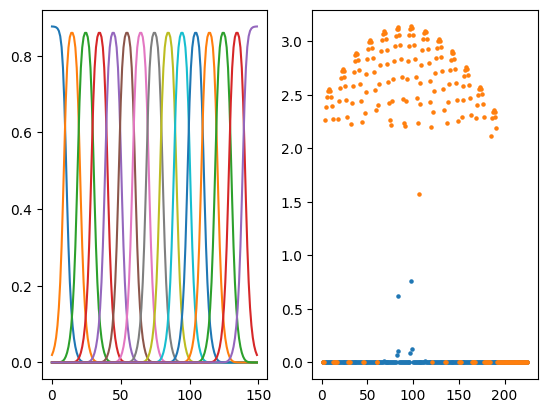

In [53]:
nX = 150
nY = 150
nCoil = 225
nRow = 15
nCol = 15
relative_radius = 3
verbose = False

centerX = np.linspace(0, nX, nRow, endpoint=False) + nX/nRow/2
centerY = np.linspace(0, nY, nCol, endpoint=False) + nY/nCol/2
X, Y = np.meshgrid(np.linspace(0, nX, nX, endpoint=False) + 0.5,np.linspace(0, nY, nY, endpoint=False) + 0.5)

sigma = 3
r_x = relative_radius*nX/nRow/2/sigma
r_y = relative_radius*nY/nCol/2/sigma


out = np.zeros((nY, nX, nCoil), dtype=np.complex64)
for row in range(nRow):
    for col in range(nCol):
        x = centerX[row]
        y = centerY[col]
        mag = np.exp(-(((X-x)/r_x)**2 + ((Y-y)/r_y)**2)/2)

        pha = np.angle((X -  x) + 1j*(Y - y))
        pha = np.exp(-(((X-x)/(5*nX/2/sigma))**2 + ((Y-y)/(5*nY/2/sigma))**2)/2) * 2*np.pi - np.pi

        # pha = np.sqrt((X-x)**2 + (Y-y)**2)/(np.minimum(nX/nRow/2, nY/nCol/2))**2 * np.pi
        # pha = pha if (row+col) % 2 == 0 else -pha 
        out[..., row*nRow+col] = to_complex(mag, pha)

norm = np.sqrt(np.sum(np.abs(out)**2, axis=2))
out = np.transpose(out, (2, 0, 1)) / norm
# out = np.transpose(out, (2, 0, 1))
# plt.imshow(np.sqrt(np.sum(np.abs(out)**2, axis=0)), cmap='gray')

fig, axs = plt.subplots(1, 2)
ax1 = axs[0]
ax2 = axs[1]
for col in range(nCol):
    ax1.plot(np.abs(out[col, :, 8]))
ax2.scatter(np.linspace(1,nCoil,nCoil), np.abs(out)[:, 75, 60], s=5)
ax2.scatter(np.linspace(1,nCoil,nCoil), np.angle(out)[:, 75, 60], s=5)

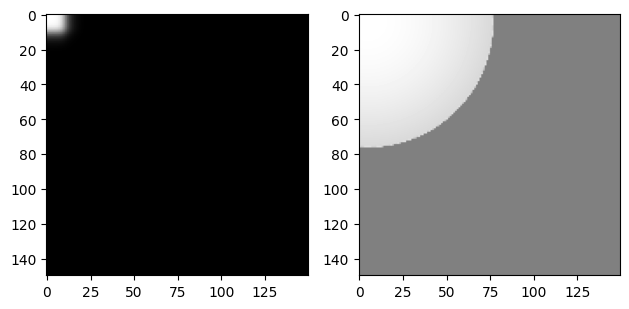

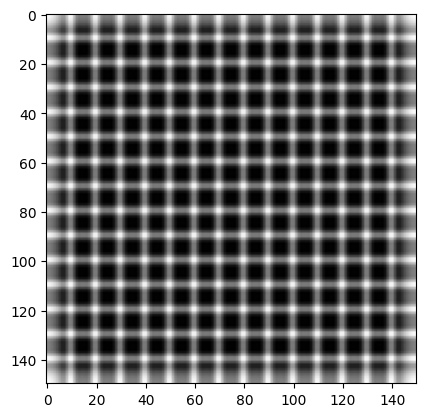

In [54]:
# fig, axs = plt.subplots(1, 2)
# ax1 = axs[0]
# ax2 = axs[1]
# for i in range(nRow):
#     ax1.plot(np.abs(out[i, :, 7]))
# ax2.set_ylim(-np.pi, np.pi)
# for row in range(1, nX, 20):
#     for col in range(1, nY, 20):
#         ax2.scatter(np.ones(nCoil)*(row*nY+col), np.angle(out)[:, row, col], s=10)


idx = 0
fig, axs = plt.subplots(1, 2)
axs[0].imshow(np.abs(out[idx, :,:]), cmap='gray')
axs[1].imshow(np.angle(out[idx, :,:]), cmap='gray', vmin=-np.pi, vmax=np.pi)
fig.tight_layout(), plt.show()
plt.imshow(np.abs(np.sqrt(np.sum(out**2, axis=0))), cmap='gray')

### 1. Coil-Sensitivity Map (CSM), real-valued

In [ ]:
# Define the parameters of the Gaussian distribution
mean = [0, 0]  # mean of the x and y coordinates


cov = [[1, 0.5], [0.5, 1]]  # covariance matrix

nX = 150
nY = 150
nBX = 5
nBY = 5
rX = nX/nBX/2 * 1
rY = nY/nBY/2 * 1
X, Y = np.meshgrid(np.linspace(0, nX/rX, nX), np.linspace(0,  nY/rY, nY))
meanX = np.linspace(0, nX/rX, nBX)
meanY = np.linspace(0, nY/rY, nBY)

Z = np.zeros((nY, nX, nBX*nBY))

grid_points = np.zeros([2, nBX*nBY])
for bx in range(nBX):
    for by in range(nBY):
        x = meanX[bx]
        y = meanY[by]
        if by % 2 == 0:
            x += nX/rX/(nBX-1)/2
        Z[..., bx*nBX+by] = np.exp(-((X - x)**2 + (Y - y)**2) / (2 * cov[0][0]))

        grid_points[0, bx*nBX+by] = x 
        grid_points[1, bx*nBX+by] = y

color_facecolor = "#000000"
color_label     = "#cccccc"

fig, axs = plt.subplots(1, 1, figsize=(5,5), squeeze=False, facecolor=color_facecolor)
ax = axs[0][0]
ax.set_facecolor(color_facecolor)
ax.tick_params(axis="both",color=color_label, labelcolor=color_label)
for spine in ax.spines:  # "left", "right", "bottom", "top"
    ax.spines[spine].set_color(color_label)

ax.yaxis.set_major_locator(plt.MultipleLocator(150))
ax.xaxis.set_major_locator(plt.MultipleLocator(150))
ax.scatter(grid_points[0,:]*rX, grid_points[1,:]*rY, s=10, alpha=1)
ax.axis('equal')
fig.savefig("E:/skope/20241115/csm_gaussian_grid/grid.png", dpi=300, transparent=True, bbox_inches="tight", pad_inches=0)
norm = np.sqrt(np.sum(np.abs(Z)**2, axis=2))
Z = np.transpose(Z, (2, 0, 1)) / norm
# Z = np.sqrt(np.sum(np.abs(Z)**2, axis=0))

In [ ]:
# Plot the 2D Gaussian distribution
plt.imshow(Z[12, :,:], cmap='gray')
plt.colorbar(label='Probability Density')
plt.title('2D Gaussian Distribution'), plt.xlabel('X'), plt.ylabel('Y')
plt.show()